In [2]:
import cv2

# Resizes a image and maintains aspect ratio
def maintain_aspect_ratio_resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    # Grab the image size and initialize dimensions
    dim = None
    (h, w) = image.shape[:2]

    # Return original image if no need to resize
    if width is None and height is None:
        return image

    # We are resizing height if width is none
    if width is None:
        # Calculate the ratio of the height and construct the dimensions
        r = height / float(h)
        dim = (int(w * r), height)
    # We are resizing width if height is none
    else:
        # Calculate the ratio of the 0idth and construct the dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # Return the resized image
    return cv2.resize(image, dim, interpolation=inter)

In [4]:
'''
    Generate wall data file for floorplan
    @Param img_path, path to input file
    @Param info, boolean if data should be printed
    @Return shape
    '''
import cv2
from utils.FloorplanToBlenderLib import *
from PIL import Image
import numpy as np

def hough_transform(image):
    # PROBABILISTIC HOUGH TRANSFORM
    edges = cv2.Canny(image, 50, 150, apertureSize=3)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=1, maxLineGap=1)
    hough_img = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)  # Convert to 3-channel image to draw colored lines
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(hough_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        #print(x1, y1, x2, y2)
    return hough_img
    
    # HOUGH TRANSFORM
    # edges = cv2.Canny(image, 50, 150, apertureSize=3)
    # lines = cv2.HoughLines(edges, 1, np.pi/180, 175)
    # hough_img = np.copy(image)  # Create a copy of the original image to draw lines on
    # for line in lines:
    #     rho, theta = line[0]
    #     a = np.cos(theta)
    #     b = np.sin(theta)
    #     x0 = a * rho
    #     y0 = b * rho
    #     x1 = int(x0 + 1000 * (-b))
    #     y1 = int(y0 + 1000 * (a))
    #     x2 = int(x0 - 1000 * (-b))
    #     y2 = int(y0 - 1000 * (a))
    #     cv2.line(hough_img, (x1, y1), (x2, y2), (0, 0, 255), 2)
    # return hough_img

img_path = "Images/maps_cropped/E2_2.png"
# Read floorplan image
img = cv2.imread(img_path)
img = maintain_aspect_ratio_resize(img, width=2000)

# Grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create wall image (filter out small objects from image)
#wall_img = detect.wall_filter(gray)

# Apply Hough Transform
hough_img = hough_transform(img)

# Display Hough Transform result
display(Image.fromarray(hough_img))
#display(Image.fromarray(wall_img))

# create verts (points 3d), points to use in mesh creations
verts = []
# create faces for each plane, describe order to create mesh points
faces = []

# Height of waLL
wall_height = 1

# Scale pixel value to 3d pos
scale = 100

# Convert boxes to verts and faces
verts, faces, wall_amount = transform.create_nx4_verts_and_faces(boxes, wall_height, scale)

# Create top walls verts
verts = []
for box in boxes:
    verts.extend([transform.scale_point_to_vector(box, scale, 0)])

# create faces
faces = []
for room in verts:
    count = 0
    temp = ()
    for _ in room:
        temp = temp + (count,)
        count += 1
    faces.append([(temp)])

ModuleNotFoundError: No module named 'pyfiglet'

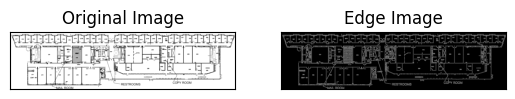

In [53]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread("Images/maps_cropped/E2_2.png", cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = maintain_aspect_ratio_resize(img, width=2000)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()